In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /tmp/data/

/tmp/data


# Visualize and choose the subset of images showing AD most clearly
Select images best showing the hippocampus, amygdala, and general cortex volume

Source: Pg. 4 of https://arxiv.org/pdf/1906.06114.pdf 

In [13]:
filename='./t1w_non_ad_patients/OAS30074sub-OAS30074_ses-d0049_run-01_T1w.nii.gz'

fig=plt.figure(figsize=(100,150))
columns = 10
rows = 26



<Figure size 7200x10800 with 0 Axes>

In [14]:
data = nib.load(filename)
data = data.get_fdata()


In [15]:
data.shape

(176, 256, 256)

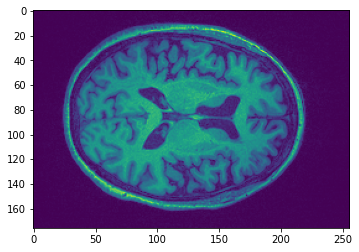

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(data[:,:,135])

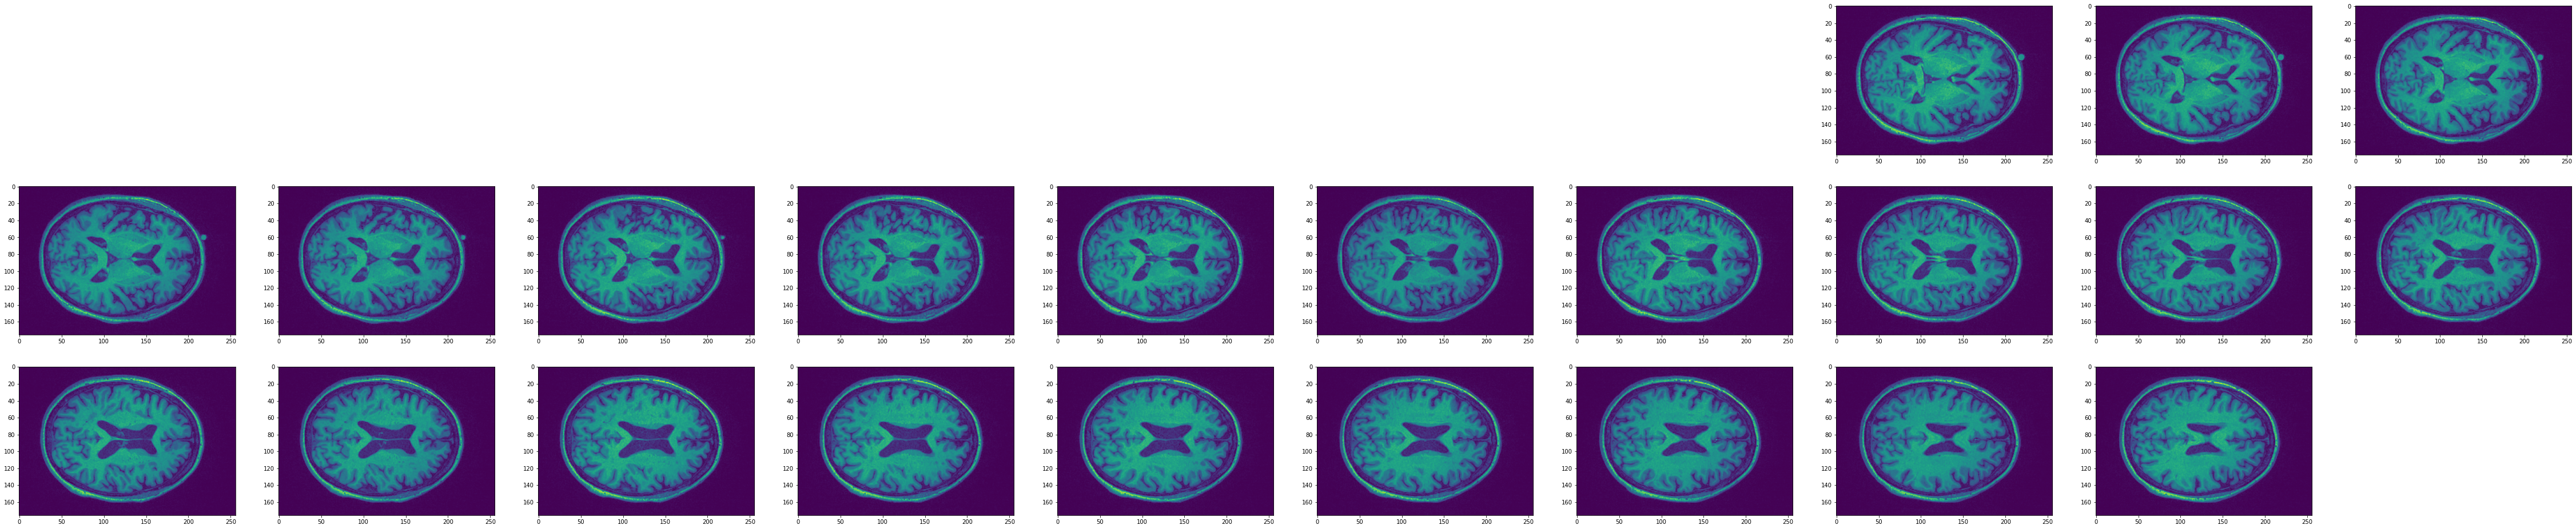

In [21]:
fig=plt.figure(figsize=(80,150))
columns = 10
rows = 26
for i in range(128, 150):
    img = data[:,:,i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

## Save images from .nii.gz files
**Side note: This colab follows 1-oasis3-t1w-cdr-split.ipynb on ubuntu20 workstation**

In this colab, we save away images 128 through 150 from the .nii.gz which represents a BIDS format MRI file containing a sequence of 256 images.

In [4]:
!apt update -y
!apt install libgl1-mesa-glx -y

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease                        
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]    
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]      
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [293 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:11 http://archive.ubuntu.com/ubuntu bionic-b

7Progress: [ 38%] [#####################.....................................] 8Selecting previously unselected package libx11-xcb1:amd64.
Preparing to unpack .../22-libx11-xcb1_2%3a1.6.4-3ubuntu0.3_amd64.deb ...
7Progress: [ 38%] [######################....................................] 8Unpacking libx11-xcb1:amd64 (2:1.6.4-3ubuntu0.3) ...
7Progress: [ 39%] [######################....................................] 8Selecting previously unselected package libxcb-dri2-0:amd64.
Preparing to unpack .../23-libxcb-dri2-0_1.13-2~ubuntu18.04_amd64.deb ...
Unpacking libxcb-dri2-0:amd64 (1.13-2~ubuntu18.04) ...
7Progress: [ 40%] [#######################...................................] 8Selecting previously unselected package libxcb-dri3-0:amd64.
Preparing to unpack .../24-libxcb-dri3-0_1.13-2~ubuntu18.04_amd64.deb ...
7Progress: [ 41%] [########################..................................] 8Unpacking libxcb-dri3-0:amd64 (1.13-2~ubuntu18.04) ...
7Progress: [ 42%] [####

7Progress: [ 86%] [##################################################........] 8Setting up libx11-6:amd64 (2:1.6.4-3ubuntu0.3) ...
7Progress: [ 88%] [##################################################........] 87Progress: [ 88%] [###################################################.......] 8Setting up libgl1-mesa-dri:amd64 (20.0.8-0ubuntu1~18.04.1) ...
7Progress: [ 89%] [###################################################.......] 8Setting up libxcb-sync1:amd64 (1.13-2~ubuntu18.04) ...
7Progress: [ 90%] [####################################################......] 8Setting up libxdamage1:amd64 (1:1.1.4-3) ...
7Progress: [ 91%] [#####################################################.....] 8Setting up libxext6:amd64 (2:1.3.3-1) ...
7Progress: [ 92%] [#####################################################.....] 8Setting up libxfixes3:amd64 (1:5.0.3-1) ...
7Progress: [ 93%] [######################################################....] 8Setting up libxxf86vm1:amd64 (1:1.1.4-1) ...

In [5]:
!pip install opencv-python
!pip install -U scikit-image
!pip install nibabel

     |████████████████████████████████| 50.4 MB 5.5 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
     |████████████████████████████████| 12.4 MB 496 kB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 25.9 MB 7.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 148 kB 697 kB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
     |████████████████████████████████| 3.3 MB 1.0 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [6]:
import glob
import os
import nibabel as nib

import cv2
import numpy as np

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
!ls

OAS30001_MR_d0129  OAS30225_MR_d0482  OAS30462_MR_d1232  OAS30734_MR_d0097
OAS30001_MR_d0757  OAS30226_MR_d0183  OAS30463_MR_d2198  OAS30734_MR_d0857
OAS30001_MR_d2430  OAS30227_MR_d0000  OAS30463_MR_d2737  OAS30735_MR_d1119
OAS30001_MR_d3132  OAS30228_MR_d0090  OAS30464_MR_d0077  OAS30737_MR_d0035
OAS30002_MR_d0371  OAS30229_MR_d0101  OAS30464_MR_d0951  OAS30737_MR_d1137
OAS30002_MR_d0653  OAS30230_MR_d3855  OAS30464_MR_d2445  OAS30739_MR_d0051
OAS30002_MR_d2340  OAS30231_MR_d1469  OAS30464_MR_d2848  OAS30740_MR_d0069
OAS30002_MR_d2345  OAS30231_MR_d2510  OAS30465_MR_d0152  OAS30741_MR_d3184
OAS30003_MR_d0558  OAS30231_MR_d3617  OAS30466_MR_d0058  OAS30742_MR_d0058
OAS30003_MR_d1631  OAS30231_MR_d3630  OAS30466_MR_d0671  OAS30742_MR_d3401
OAS30003_MR_d2669  OAS30232_MR_d0120  OAS30467_MR_d0092  OAS30742_MR_d3619
OAS30003_MR_d2682  OAS30232_MR_d0695  OAS30468_MR_d0069  OAS30742_MR_d4551
OAS30003_MR_d3320  OAS30232_MR_d2324  OAS30469_MR_d0112  OAS30743_MR_d0051
OAS30003_MR_d3731  OAS302

In [9]:
!mkdir t1w_non_ad_jpgs

mkdir: cannot create directory ‘t1w_non_ad_jpgs’: File exists


In [10]:
# glob all nii.gz files
t1w_non_ad_files = glob.glob('./t1w_non_ad_patients/**.nii.gz')

In [40]:
training_imgs_base_dir = './t1w_non_ad_jpgs'

In [71]:
def read_save_t1w_scan(filepath, img_start, img_end):
    data_load = nib.load(filepath)
    data = data_load.get_fdata()
    suffix_name = filepath.split("sub-")[-1]
    name = suffix_name.split(".nii.gz")[0]
    for i in range(img_start, img_end):
        save_path = training_imgs_base_dir + '/' + str(i) + '/' + name + '.jpg'
        cv2.imwrite(save_path, data[:,:,i])

In [74]:
img_start = 128
img_end = 151

for i in range(img_start, img_end):
    if not os.path.isdir(training_imgs_base_dir + '/' +  str(i)):
        os.mkdir(training_imgs_base_dir + '/' +  str(i))

for filepath in t1w_non_ad_files:
    try:
        read_save_t1w_scan(filepath, img_start, img_end)
    except:
        continue